In [1]:
import  torch
import  numpy;
from    matplotlib.colors   import  LinearSegmentedColormap
import  matplotlib.pyplot   as      plt
%matplotlib inline

# Overall workflow and training

Data generation/training can be performed by built-in executable `lasdi`. For this example of Burgers 1D equation, you can simply run on command-line terminal:
```
lasdi burgers1d.yml
```

The workflow can be also manually constructed for those who prefer python scripts and for prototyping. Following code snippets show the high-level view of the workflow in the executable `lasdi`.

16:43:54.645 - Initialize:Initialize_Trainer:88 - INFO - Initializing Trainer (gplasdi)
16:43:54.645 - InputParser:__init__:52 - INFO - Initializing InputParser (param_space_input)
16:43:54.645 - ParameterSpace:__init__:177 - INFO - Initializing a ParameterSpace object with parameters ['a', 'w']
16:43:54.646 - ParameterSpace:__init__:185 - INFO - The training set has 4 parameter combinations
16:43:54.646 - ParameterSpace:__init__:193 - INFO - The testing set has 25 parameter combinations
16:43:54.646 - Initialize:Initialize_Physics:226 - INFO - Initializing Physics (burgers1d)
16:43:54.646 - InputParser:__init__:52 - INFO - Initializing InputParser (burgers1d_input)
16:43:54.647 - InputParser:getInput:137 - WARNING - InputParser Warning: datatype is not checked.
 key: ['simulation_time']
 value type: <class 'float'>
16:43:54.647 - Initialize:Initialize_Model:168 - INFO - Initializing Model (pair)
16:43:54.647 - Model:__init__:592 - INFO - Initializing an Autoencoder_Pair...
16:43:54.64

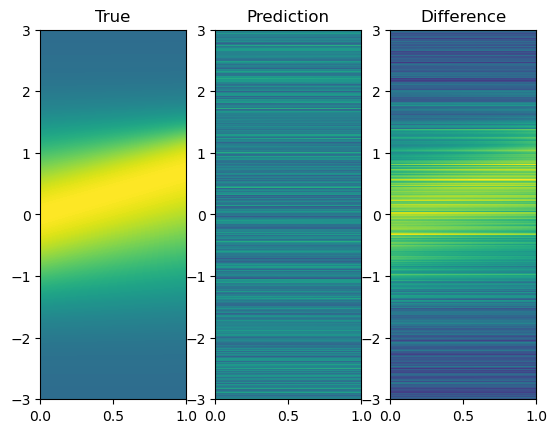

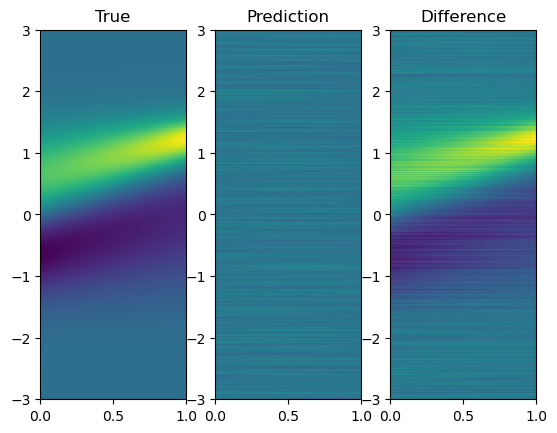

16:44:18.857 - GPLaSDI:train:244 - INFO - Training for 4000 epochs (starting at 0, going to 4000) with 4 parameters
16:44:18.910 - GPLaSDI:train:353 - INFO - Iter: 00001/28000, Loss: 0.6544579864, Loss Disp: 0.2087714970, Loss Vel: 0.0258944966, Loss Consistency: 0.3991855979, Loss LD: 0.8211368918, Loss COEF: 311.7530517578, max|c|: 47.0, 
16:44:18.935 - GPLaSDI:train:353 - INFO - Iter: 00002/28000, Loss: 2.3109126091, Loss Disp: 0.1914130747, Loss Vel: 0.0304404367, Loss Consistency: 2.0685772896, Loss LD: 0.8168199658, Loss COEF: 244.9389953613, max|c|: 30.1, 
16:44:18.965 - GPLaSDI:train:353 - INFO - Iter: 00003/28000, Loss: 0.7248644829, Loss Disp: 0.1788725257, Loss Vel: 0.0253589395, Loss Consistency: 0.5006533861, Loss LD: 0.7949587107, Loss COEF: 422.4961242676, max|c|: 40.6, 
16:44:18.991 - GPLaSDI:train:353 - INFO - Iter: 00004/28000, Loss: 0.5554075241, Loss Disp: 0.1694726348, Loss Vel: 0.0241986178, Loss Consistency: 0.3411188126, Loss LD: 0.8172907829, Loss COEF: 740.744

Function name	Calls	Total time	Time/call

train_step	4000	1.057e+02	2.642e-02

finalize	1	2.171e-03	2.171e-03



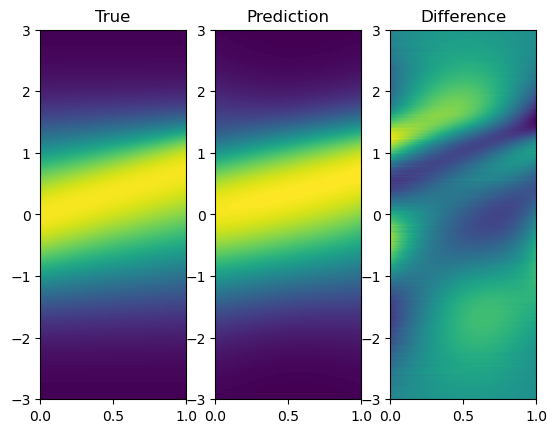

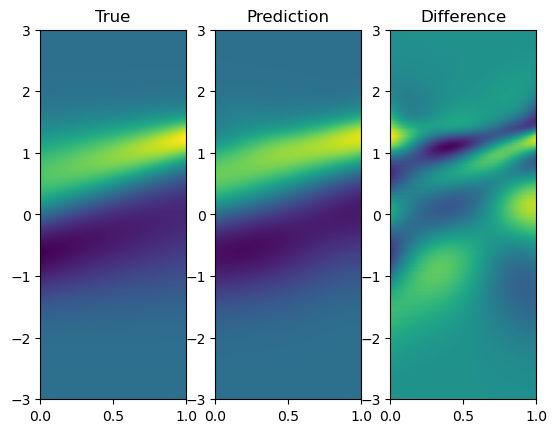

16:46:13.970 - GPLaSDI:get_new_sample_point:451 - INFO - 
~~~~~~~ Finding New Point ~~~~~~~
/Users/stephany1/Documents/Projects/Second Order LaSDI/src/GPLaSDI.py:458: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues 

Function name	Calls	Total time	Time/call

train_step	8000	2.439e+02	3.049e-02

finalize	2	3.406e-03	1.703e-03

new_sample	1	1.243e+01	1.243e+01



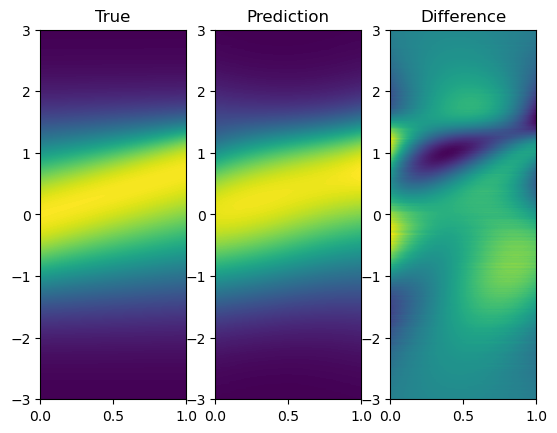

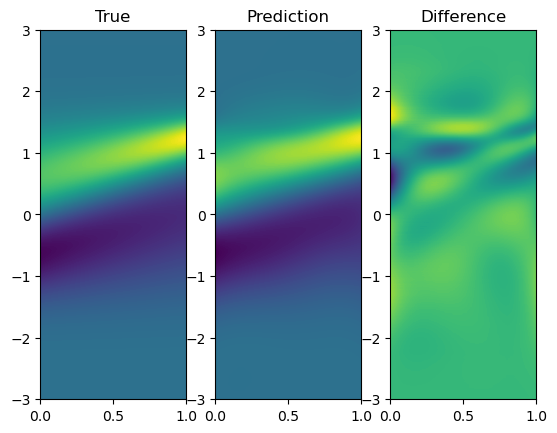

16:48:54.473 - GPLaSDI:get_new_sample_point:451 - INFO - 
~~~~~~~ Finding New Point ~~~~~~~
/Users/stephany1/Documents/Projects/Second Order LaSDI/src/GPLaSDI.py:458: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues 

In [ ]:
# -------------------------------------------------------------------------------------------------
# Imports 
# -------------------------------------------------------------------------------------------------

import  os;
import  sys;
src_path    : str = os.path.join(os.path.abspath(os.path.pardir), "src");
utils_path  : str = os.path.join(src_path, "Utilities");
sys.path.append(src_path);
sys.path.append(utils_path);

import  yaml;
import  logging;

from    Sample      import  Run_Samples, Pick_Samples;
from    Initialize  import  Initialize_Trainer;
from    Logging     import  Initialize_Logger, Log_Dictionary;
from    Plot        import  Plot_Frame_2d;


# -------------------------------------------------------------------------------------------------
# Setup
# -------------------------------------------------------------------------------------------------

# Set up the logger
Initialize_Logger(logging.INFO);
LOGGER  : logging.Logger    = logging.getLogger(__name__);

# Load the configuration.
cfg_file : str = 'burgers1d.yml';
with open(cfg_file, 'r') as f:
    config : dict = yaml.safe_load(f);
Log_Dictionary(LOGGER = LOGGER, D = config, level = logging.DEBUG);

# Setup the trainer
trainer, param_space, physics, autoencoder, sindy = Initialize_Trainer(config);



# -------------------------------------------------------------------------------------------------
# Train
# -------------------------------------------------------------------------------------------------

LOGGER.info("Training with %d epochs" % trainer.max_iter);

# generate initial training/test data
Pick_Samples(trainer, config);
Run_Samples(trainer, config);


Plot_Frame_2d(fom_frame = [trainer.X_Train[0][0], trainer.X_Train[1][0]], 
              model     = trainer.model, 
              t_grid    = trainer.physics.t_grid, 
              x_grid    = trainer.physics.x_grid);

# initial training given training data
trainer.train();

Plot_Frame_2d(fom_frame = [trainer.X_Train[0][0], trainer.X_Train[1][0]], 
              model     = trainer.model, 
              t_grid    = trainer.physics.t_grid, 
              x_grid    = trainer.physics.x_grid);


while (trainer.restart_iter < trainer.max_iter):
    if (trainer.restart_iter <= trainer.max_greedy_iter):
        # perform greedy sampling to pick up new samples
        Pick_Samples(trainer, config);
        # update training data with newly picked samples
        Run_Samples(trainer, config);

    # train over given training data
    trainer.train();

    # Plot 
    Plot_Frame_2d(  fom_frame = [trainer.X_Train[0][0], trainer.X_Train[1][0]], 
                    model     = trainer.model, 
                    t_grid    = trainer.physics.t_grid, 
                    x_grid    = trainer.physics.x_grid);

If you ran the command instead, a restart file is saved at the end of the training, which can be loaded for post-processing:

In [ ]:
# Add src directory to the search path
import  os;
import  sys;
src_path    : str = os.path.join(os.path.abspath(os.path.pardir), "src");
sys.path.append(src_path);

import  yaml
from    ParameterSpace  import  ParameterSpace;
from    Initialize      import  Initialize_Trainer;

# Specify the restart file you have.
filename = 'lasdi_10_01_2024_17_09.npy'

cfg_file = 'burgers1d.yml'
with open(cfg_file, 'r') as f:
    config = yaml.safe_load(f)

restart_file = numpy.load(filename, allow_pickle=True).item()

trainer, param_space, physics, autoencoder, sindy = Initialize_Trainer(config, restart_file)

# Post-processing

Load data for post-processing:

In [5]:
coefs = trainer.best_coefs
X_Train = trainer.X_Train
X_Test = trainer.X_Test

param_train = param_space.train_space
param_grid = param_space.test_space
test_meshgrid = param_space.test_meshgrid
test_grid_sizes = param_space.test_grid_sizes
n_init = param_space.n_init_trains

n_a_grid, n_w_grid = test_grid_sizes
a_grid, w_grid = test_meshgrid

t_grid = physics.t_grid
x_grid = physics.x_grid
t_mesh, x_mesh = numpy.meshgrid(t_grid, x_grid)
Dt, Dx = physics.dt, physics.dx

time_dim, space_dim = t_grid.shape[0], x_grid.shape[0]

n_coef = sindy.ncoefs

They can be also loaded directly from restart file:

In [ ]:
coefs = restart_file['trainer']['best_coefs']
X_Train = restart_file['trainer']['X_Train']
X_Test = restart_file['trainer']['X_Test']

paramspace_dict = restart_file['parameters']
param_train = paramspace_dict['train_space']
param_grid = paramspace_dict['test_space']
test_meshgrid = paramspace_dict['test_meshgrid']
test_grid_sizes = paramspace_dict['test_grid_sizes']
n_init = paramspace_dict['n_init']

n_a_grid, n_w_grid = test_grid_sizes
a_grid, w_grid = test_meshgrid

physics_dict = restart_file['physics']
t_grid = physics_dict['t_grid']
x_grid = physics_dict['x_grid']
t_mesh, x_mesh = numpy.meshgrid(t_grid, x_grid)
Dt = physics_dict['dt']
Dx = physics_dict['dx']

time_dim, space_dim = t_grid.shape[0], x_grid.shape[0]
n_coef = restart_file['latent_dynamics']['ncoefs']

## Gaussian-process uncertainty evaluation
We evaluated the uncertainties of latent dynamics coefficients over 2d parameter space, with samples from GP prediction:

In [ ]:
from GaussianProcess        import  fit_gps, eval_gp
from Simulate               import  sample_roms, average_rom
from lasdi.postprocess      import  compute_errors

n_samples = 20
autoencoder.cpu()

gp_dictionnary = fit_gps(param_space.train_space, coefs)

Zis_samples = sample_roms(autoencoder, physics, sindy, gp_dictionnary, param_grid, n_samples)
Zis_mean = average_rom(autoencoder, physics, sindy, gp_dictionnary, param_grid)

X_pred_mean = autoencoder.decoder(torch.Tensor(Zis_mean)).detach().numpy()
X_pred_samples = autoencoder.decoder(torch.Tensor(Zis_samples)).detach().numpy()

avg_rel_error = numpy.zeros(param_grid.shape[0])
for k in range(param_grid.shape[0]):
    avg_rel_error[k], _ = compute_errors(X_pred_mean[k], physics, X_Test[k].numpy())

max_std = numpy.zeros(param_grid.shape[0])
for k in range(param_grid.shape[0]):
    max_std[k] = X_pred_samples[k].std(0).max()

avg_rel_error = avg_rel_error.reshape([n_w_grid, n_a_grid]).T
max_std = max_std.reshape([n_w_grid, n_a_grid]).T

gp_pred_mean, gp_pred_std = eval_gp(gp_dictionnary, param_grid)

# Visualization

Plot mean and standard deviation of coefficient matrix.
For SINDy of dimension 5, the coefficient matrix has a shape of (6, 5).

In [ ]:
from lasdi.postprocess import plot_gp2d

plot_gp2d(a_grid, w_grid, gp_pred_mean.reshape([n_a_grid, n_w_grid, -1]), gp_pred_std.reshape([n_a_grid, n_w_grid, -1]),
          param_train, param_labels=['a', 'w'], plot_shape=[6, 5])

In [ ]:
from lasdi.postprocess import heatmap2d

heatmap2d(avg_rel_error * 100, a_grid[:, 0], w_grid[0], param_train, 4, param_labels=['a', 'w'], title='GPLaSDI')

In [ ]:
heatmap2d(max_std * 100, a_grid[:, 0], w_grid[0], param_train, 4, param_labels=['a', 'w'], title=r'max$_{(t,x)}\sqrt{V[\tilde{u}_{\xi^*}]}$   ($\times10^{-2}$)')

In [ ]:
from lasdi.postprocess import plot_prediction

a, w = 0.9, 1.07
param = numpy.array([[a, w]])
true = physics.solve(param[0])
true = true.detach().numpy().reshape([physics.grid_size[0], physics.nt]).T
scale = 1

Z = sample_roms(autoencoder, physics, sindy, gp_dictionnary, param, n_samples)

Z_mean = Z[0].mean(0)
Z_std = Z[0].std(0)

pred = autoencoder.decoder(torch.Tensor(Z)).detach().numpy()
pred_std = pred[0].std(0)

plot_prediction(param, autoencoder, physics, sindy, gp_dictionnary, n_samples, true, scale)